Credit to the work in here: http://www.fundza.com/vectors/point2line/index.html

In [ ]:
import numpy as np
import math
import gmplot
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline 

def gaussian(x, mu, sig):
    return 1./(math.sqrt(2.*math.pi)*sig)*np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

def draw_plot(mean_x, mean_y, s_v):
    
    # display predicted scores by the model as a contour plot
    x = np.linspace(0.0, 10.0)
    y = np.linspace(0.0, 10.0)
    X, Y = np.meshgrid(x, y)
    XX = np.array([X.ravel(), Y.ravel()]).T

    probs = np.zeros(2500)

    idx=0
    for point in XX:
        r1 = math.sqrt((point[0]-mean_x)*(point[0]-mean_x)+(point[1]-mean_y)*(point[1]-mean_y))
#         r2 = math.sqrt((point[0]-0.5)*(point[0]-0.5)+(point[1]-0.5)*(point[1]-0.5))
#         probs[idx] = 0.5*gaussian(r1, 0, .2)+0.5*gaussian(r2, 0, .2)
        probs[idx] = gaussian(r1, 0, s_v)

        idx = idx+1

    probs = probs.reshape((50, 50));

    CS = plt.contour(X, Y, probs);
    CB = plt.colorbar(CS, shrink=0.8, extend='both')

    plt.title('PDF')
    plt.axis('tight')
    plt.show()

In [19]:
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')

# ax.plot_wireframe(X, Y, probs)
# plt.show()

# Hello Text in Juputer
$$c = \sqrt{a^2 + b^2}$$

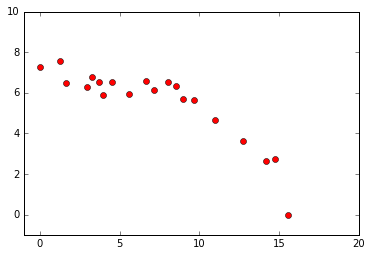

In [23]:
def coordinate_conversion(P_lat, P_lon):
    """Convert GPS coordinates in to XY coordinate
    
    P_x = (P_lon − SW_lon) ∗ cos(SW_lat * pi / 180) ∗ 111.323
    P_y = (P_lat − SW_lat) ∗ 111.323

    Args:
        P_lat: 
        P_lon: 

    Returns:
        A point in XY coordinate.

    """
    P_x = (P_lon - SW_lon) * math.cos(SW_lat * math.pi / 180) * 111.323
    P_y = (P_lat - SW_lat) * 111.323
    
    return P_x, P_y

def arc_length(degree, radius):
    '''
    length= degree * pi * radius / 180
    '''
    length = degree * math.pi * radius / 180
    return length

def convert_spree(spree_coords):

    XY_coords = []
    for GPS_coord in spree_coords:
        P_x, P_y = coordinate_conversion(GPS_coord[0], GPS_coord[1])
        XY_coords.append([P_x, P_y])
        
    return XY_coords


def draw_on_google_map(map_center, coords):

    gmap = gmplot.GoogleMapPlotter(map_center[0], map_center[1], 13)

#     gmap.plot(coords[:,0], coords[:,1], 'cornflowerblue', edge_width=10)
#     gmap.scatter(coords[:,0], coords[:,1], '#000000', size=400, marker=True)
#     gmap.scatter(marker_lats, marker_lngs, 'k', marker=True)
    gmap.heatmap(coords[:,0], coords[:,1], radius=100, opacity=0.5)

    gmap.draw("mymap.html")

SW_lat = 52.464011 #(Latitude)
SW_lon = 13.274099 #(Longitude)
EARTH_RADIUS = 6371000 #Earth radius in meter

BERLIN_LAT = 52.5167
BERLIN_LON = 13.3833

SPREE_GPS = [
    [52.529198,13.274099],
    [52.531835,13.29234],
    [52.522116,13.298541],
    [52.520569,13.317349],
    [52.524877,13.322434],
    [52.522788,13.329],
    [52.517056,13.332075],
    [52.522514,13.340743],
    [52.517239,13.356665],
    [52.523063,13.372158],
    [52.519198,13.379453],
    [52.522462,13.392328],
    [52.520921,13.399703],
    [52.515333,13.406054],
    [52.514863,13.416354],
    [52.506034,13.435923],
    [52.496473,13.461587],
    [52.487641,13.483216],
    [52.488739,13.491456],
    [52.464011,13.503386]]

def main():

    
#     ORI_x, ORI_y = coordinate_conversion(SW_lat, SW_lon)
#     DES_x, DES_y = coordinate_conversion(SW_lat, SW_lon+1)

#     B_GATE_lat = 52.516288
#     B_GATE_lon = 13.377689
#     B_GATE_x , B_GATE_y = coordinate_conversion(B_GATE_lat, B_GATE_lon)

#     print ORI_x, ORI_y, DES_x, DES_y

#     ratio = (DES_x - ORI_x)/arc_length(1, EARTH_RADIUS)
#     print ratio

#     standard_deviation = ratio*2730/2
#     print variance

#     draw_plot(B_GATE_x, B_GATE_y, standard_deviation)
    spree_coords = convert_spree(SPREE_GPS)
    spree_coords = np.asarray(spree_coords)
    plt.plot(spree_coords[:, 0], spree_coords[:, 1], 'ro')
    plt.axis([-1, 20, -1, 10])
    plt.show()
    
    draw_on_google_map([BERLIN_LAT, BERLIN_LON], np.asarray(SPREE_GPS))

if __name__ == "__main__": 
    main()

In [27]:
import requests
f=open('static.png','wb')
f.write(requests.get('http://maps.googleapis.com/maps/api/staticmap?center=31.0456,121.3997&zoom=12&size=320x385&sensor=false').content)
f.close()

In [15]:
import math
def dot(v,w):
    x,y,z = v
    X,Y,Z = w
    return x*X + y*Y + z*Z

def length(v):
    x,y,z = v
    return math.sqrt(x*x + y*y + z*z)

def vector(b,e):
    x,y,z = b
    X,Y,Z = e
    return (X-x, Y-y, Z-z)

def unit(v):
    x,y,z = v
    mag = length(v)
    return (x/mag, y/mag, z/mag)

def distance(p0,p1):
    return length(vector(p0,p1))

def scale(v,sc):
    x,y,z = v
    return (x * sc, y * sc, z * sc)

def add(v,w):
    x,y,z = v
    X,Y,Z = w
    return (x+X, y+Y, z+Z)

def distance_to_line(pnt, start, end):
    """
    Calculate the shortest distance between a point and a line segment.
    >>> distance_to_line([0, 0, 0], [1, 0, 0], [1, 1, 0])
    1.0
    >>> distance_to_line([0, 0, 0], [1, 0, 0],[0, 1, 0])
    0.707106781187
    """
    line_vec = vector(start, end)
    pnt_vec = vector(start, pnt)
    line_len = length(line_vec)
    line_unitvec = unit(line_vec)
    pnt_vec_scaled = scale(pnt_vec, 1.0/line_len)
    t = dot(line_unitvec, pnt_vec_scaled)    
    if t < 0.0:
        t = 0.0
    elif t > 1.0:
        t = 1.0
    nearest = scale(line_vec, t)
    dist = distance(nearest, pnt_vec)
    nearest = add(nearest, start)
    return (dist, nearest)

[distance,nearest_p] = distance_to_line([0, 0, 0], [1, 0, 0],[0, 1, 0])
print distance

0.707106781187
